## Homework 2 

### Template for Gradient Descent Using Python and AD (automatic differentiation)

### Before start, make sure you have configured python environment and have PyTorch, Numpy package installed.

## Some hints

1. Be sure to clear gradient at the end of each iteration
2. Use backtracking line search for choosing step size
3. Check gradient norm as the stopping criterion


In [7]:
def my_GD(data, params, loss, eps=0.1, max_iter=1e3):
    # Define the constants for backtracking line search
    ls_alpha = 0.01
    ls_beta = 0.5

    # Initialize lists to store the objective values and parameter values
    obj_all = []
    params_all = []

    for i in range(int(max_iter)):
        # Calculate the loss
        current_loss = loss(data, params)
        
        # Store the current loss and parameters
        obj_all.append(current_loss.item())  # Convert to a Python float for storage
        params_all.append(params.clone().detach().numpy())  # Store a copy of params

        # Calculate the current gradient (on params)
        current_loss.backward()  # Assuming `loss` function returns a tensor requiring gradients
        grad_norm = params.grad.norm()  # Calculate the norm of the gradient

        # If the gradient is small enough, stop and return
        if grad_norm < eps:
            break

        # Backtracking line search to find an appropriate step size
        step_size = 1
        while loss(data, params - step_size * params.grad) > current_loss - ls_alpha * step_size * grad_norm ** 2:
            step_size *= ls_beta

        # Update the parameters
        with torch.no_grad():  # To prevent tracking in autograd
            params -= step_size * params.grad

        # Clear the gradient
        params.grad.data.zero_()

    # Final parameter estimation
    beta_est = params.clone().detach()

    # Return the final parameters, all objective values, and all parameters during optimization
    return beta_est, obj_all, params_all

## Rosenbrock 函数优化

$$
\min_{\boldsymbol{x}\in\mathbb{R}^2} (1-x_1)^2 + 100(x_2 - x_1^2)^2.
$$

(-20.0, 20.0)

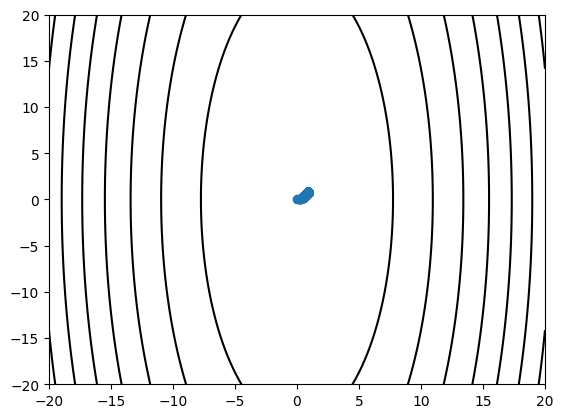

In [8]:
import torch
import numpy as np

def loss(data, params):
    x1, x2 = params[0], params[1]
    return (1 - x1)**2 + 100 * (x2 - x1**2)**2

## choose the initial parameters
params = torch.tensor([0.0, 0.0], requires_grad=True)

## run the gradient descent algorithm
## there is no data in this objective function, so we just pass in a dummy variable _
beta_est, obj_all, params_all = my_GD(_, params, loss)

## plot the objective function
import matplotlib.pyplot as plt
x = np.linspace(-20, 20, 1000)
y = np.linspace(-20, 20, 1000)

X, Y = np.meshgrid(x, y)
Z = 5 * X * X + 0.5 * Y * Y
plt.contour(X, Y, Z, colors='black')
params_all = np.array(params_all)
plt.plot(params_all[:,0],params_all[:,1], '-o')
plt.xlim(-20, 20)
plt.ylim(-20, 20)

## Beale 函数
$$
\min_{\boldsymbol{x}\in\mathbb{R}^2} (1.5 - x_1 + x_1 x_2)^2 + (2.25 - x_1 + x_1 x_2^2)^2 + (2.625 - x_1 + x_1 x_2^3)^2.
$$

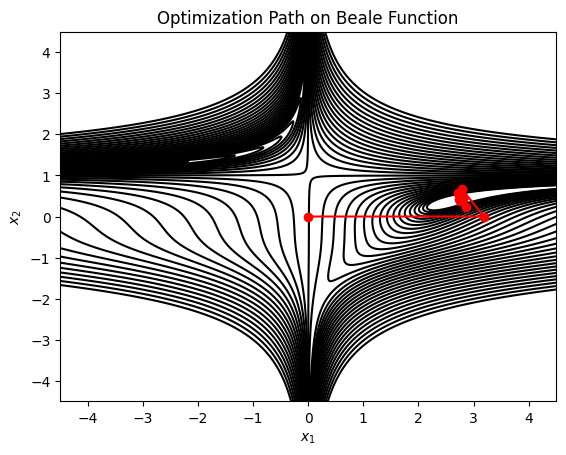

In [9]:
## similar to the previous example
import torch
import numpy as np
import matplotlib.pyplot as plt

# 定义 Beale 损失函数
def loss(data, params):
    x1, x2 = params[0], params[1]
    term1 = (1.5 - x1 + x1 * x2)**2
    term2 = (2.25 - x1 + x1 * x2**2)**2
    term3 = (2.625 - x1 + x1 * x2**3)**2
    return term1 + term2 + term3

# 选择初始参数
params = torch.tensor([0.0, 0.0], requires_grad=True)  # 例如，初始参数设置为 [0, 0]

# 运行梯度下降算法
# 由于此目标函数中没有数据，传入一个占位符变量 _
beta_est, obj_all, params_all = my_GD(_, params, loss)

# 绘制目标函数的等高线
x = np.linspace(-4.5, 4.5, 1000)
y = np.linspace(-4.5, 4.5, 1000)
X, Y = np.meshgrid(x, y)
Z = (1.5 - X + X * Y)**2 + (2.25 - X + X * Y**2)**2 + (2.625 - X + X * Y**3)**2  # 计算 Beale 函数值

plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3, 35), colors='black')
params_all = np.array(params_all)
plt.plot(params_all[:, 0], params_all[:, 1], '-o', color="red")
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Optimization Path on Beale Function')
plt.show()

## 线性回归问题（已给定模拟数据）
$$
\min_{\beta\in\mathbb{R}^p} \frac{1}{2n}\sum_{i=1}^n(y_i-\beta^\top x_i)^2.
$$

In [10]:
## Define the loss function of linear regression
def loss(data, beta):
    X, y = data['X'], data['y']
    residuals = y - X @ beta
    return (residuals ** 2).mean() / 2  # 均方误差的平均值

## Example of least square regression
import torch
import numpy as np

n = 100
p = 15

# Generate data.
torch.manual_seed(123)
X = torch.randn(n, p)
y = torch.randn(n)
data = {'X': X, 'y': y}

## initialize the parameter variables
## and fit the data to the model
params = torch.ones(p, requires_grad=True)
beta_est, obj_all, _ = my_GD(data, params, loss)

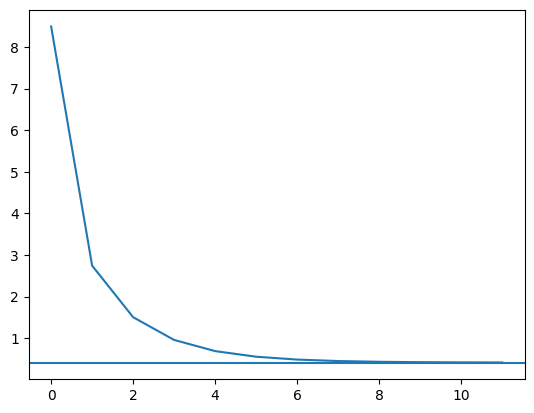

In [11]:
## Check results
import matplotlib.pyplot as plt

beta_explicit = torch.inverse(X.T@X)@X.T@y
plt.plot(obj_all)
plt.axhline(y = loss(data, beta_explicit))

In [12]:
## Compare with explicit solution
torch.set_printoptions(sci_mode=False, precision=5)
print(beta_est)
beta_explicit

tensor([ 0.03581,  0.05869,  0.03459, -0.00995, -0.08082, -0.01216,  0.01485,
         0.10673,  0.02123, -0.04864,  0.10387,  0.14670,  0.08113, -0.07081,
         0.09993])


tensor([ 0.04555,  0.07243,  0.05063, -0.00312, -0.07592,  0.00094,  0.04573,
         0.10260,  0.03271, -0.03242,  0.12407,  0.16181,  0.07612, -0.08612,
         0.09127])

## 逻辑回归问题（已给定模拟数据）
$$
\min_{\beta\in\mathbb{R}^p} \frac{1}{n}\sum_{i=1}^n\log (1+\exp(-y_i\beta^\top x_i)).
$$

In [13]:
## Define the loss function of logistic regression
def logistic_loss(data, beta):
    X, y = data['X'], data['y']
    logits = X @ beta
    # 计算对数似然损失
    return (torch.log(1 + torch.exp(-y * logits))).mean()

## Example of least square regression
import torch
import numpy as np

n = 100
p = 15

# Generate data.
torch.manual_seed(123)
X = torch.randn(n, p)
beta_true = torch.randn(p)
y = torch.distributions.Bernoulli(logits = X @ beta_true).sample()
data = {'X': X, 'y': y}

## initialize the parameter variables
## and fit the data to the model
params = torch.ones(p, requires_grad=True)
beta_est, obj_all, _ = my_GD(data, params, loss)